# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

     |████████████████████████████████| 13.1MB 310kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# set pandas options
# show all the columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

## Load the Data

In [7]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

dfs = {
    "df_hh_income" : df_hh_income,
    "df_pct_poverty": df_pct_poverty,
    "df_pct_completed_hs":df_pct_completed_hs,
    "df_share_race_city":df_share_race_city,
    "df_fatalities":df_fatalities
    }

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [11]:

for k in dfs.keys():
    print(k)
    print("\t","shape:",dfs[k].shape)
    print("\t","# rows:",dfs[k].shape[0])
    print("\t","# columns:",dfs[k].shape[1])
    print("\t","columns:",dfs[k].columns)
    print("\t","NaN?:",dfs[k].isnull().values.any())
    print("\t","duplicates?:",dfs[k].duplicated().any())
    print()
    



df_hh_income
	 shape: (29322, 3)
	 # rows: 29322
	 # columns: 3
	 columns: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
	 NaN?: True
	 duplicates?: False

df_pct_poverty
	 shape: (29329, 3)
	 # rows: 29329
	 # columns: 3
	 columns: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
	 NaN?: False
	 duplicates?: False

df_pct_completed_hs
	 shape: (29329, 3)
	 # rows: 29329
	 # columns: 3
	 columns: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
	 NaN?: False
	 duplicates?: False

df_share_race_city
	 shape: (29268, 7)
	 # rows: 29268
	 # columns: 7
	 columns: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
	 NaN?: False
	 duplicates?: False

df_fatalities
	 shape: (2535, 14)
	 # rows: 2535
	 # columns: 14
	 columns: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state'

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [12]:
for k in dfs.keys():
    dfs[k] = dfs[k].fillna(0)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [71]:
def try_to_float(x):
    try:
        return float(x)
    except:
        return 0

temp = pd.concat(
    [dfs["df_pct_poverty"],dfs["df_share_race_city"]],
    axis=1)
        
temp = temp.drop(columns=["Geographic area","City"])

for c in temp.columns:
    if c == "Geographic Area":
        pass
    else:
        temp[c] = temp[c].apply(try_to_float)


temp = temp.groupby(by="Geographic Area").mean()
# mean is not the best way to do this... we should need to bring in the population for each state to be more accurate. 
# temp = temp.reset_index()

temp = temp.sort_values(by="poverty_rate",ascending=False)
temp.head()




,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic Area,,,,,,
MS,26.88,56.42,39.17,1.65,0.53,2.34
AZ,25.27,60.64,1.17,27.75,0.73,19.87
GA,23.66,62.24,30.26,0.30,1.79,6.45
AR,22.96,78.37,16.16,0.76,0.52,4.55
NM,22.51,66.80,0.89,14.61,0.59,43.03


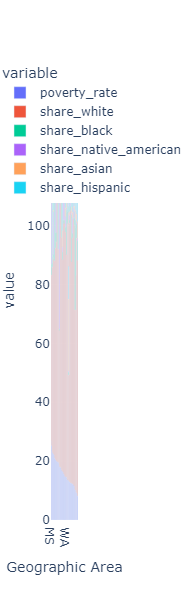

In [74]:
fig = px.bar(
    temp,
    height=600,
    # barmode="group"
    )
fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [81]:
def try_to_float(x):
    try:
        return float(x)
    except:
        return 0

temp = dfs["df_pct_completed_hs"].copy()
temp["percent_completed_hs"] = temp["percent_completed_hs"].apply(try_to_float)
temp = temp[["Geographic Area","percent_completed_hs"]].groupby("Geographic Area").mean("percent_completed_hs").reset_index()
temp = temp.sort_values(by="percent_completed_hs",ascending=False)
display(temp.head())
display(temp.tail())



,Geographic Area,percent_completed_hs
19,MA,92.03
11,HI,91.67
6,CT,91.59
21,ME,91.43
30,NH,90.71


,Geographic Area,percent_completed_hs
18,LA,79.12
32,NM,78.97
10,GA,78.63
25,MS,78.47
43,TX,74.09


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [116]:
def try_to_float(x):
    # print(x)
    try:
        return float(x[1])
    except:
        return 0

temp = pd.concat(
    [dfs["df_pct_poverty"],dfs["df_pct_completed_hs"]],
    axis=1)

temp["state"] = temp.iloc[:, 0]
temp = temp.drop(columns=["Geographic Area","City"])

# temp = temp.set_index("state")
temp["poverty_rate"] = temp["poverty_rate"].apply(try_to_float)
temp["percent_completed_hs"] = temp["percent_completed_hs"].apply(try_to_float)

temp.head()

temp = temp.groupby(by="state").mean()
# # mean is not the best way to do this... we should need to bring in the population for each state to be more accurate. 
temp = temp.reset_index()

temp = temp.sort_values(by="poverty_rate",ascending=False)
temp.head()
temp.tail()

,state,poverty_rate,percent_completed_hs
39,RI,1.47,4.17
20,MD,1.30,4.33
19,MA,1.22,4.80
6,CT,1.12,4.85
31,NJ,0.93,4.56


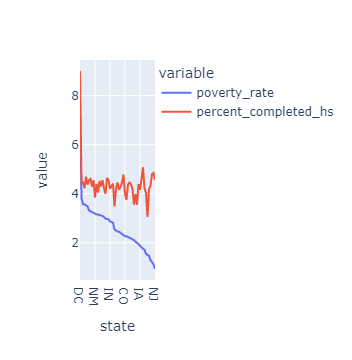

In [117]:
fig = px.line(temp, x="state", y=["poverty_rate","percent_completed_hs"])
fig.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [137]:
def try_to_float(x):
    # print(x)
    try:
        return float(x[1])
    except:
        return 0

temp = pd.concat(
    [dfs["df_pct_poverty"],dfs["df_pct_completed_hs"]],
    axis=1)

temp["city_state"] = temp.iloc[:, 1] + " " + temp.iloc[:, 0]
temp["state"] = temp.iloc[:, 0]
temp = temp.drop(columns=["Geographic Area","City"])

temp["poverty_rate"] = temp["poverty_rate"].apply(try_to_float)
temp["percent_completed_hs"] = temp["percent_completed_hs"].apply(try_to_float)

temp.head()
temp.tail()

,poverty_rate,percent_completed_hs,city_state,state
29324,8.00,0.00,Woods Landing-Jelm CDP WY,WY
29325,5.00,5.00,Worland city WY,WY
29326,0.00,9.00,Wright town WY,WY
29327,0.00,9.00,Yoder town WY,WY
29328,0.00,0.00,Y-O Ranch CDP WY,WY


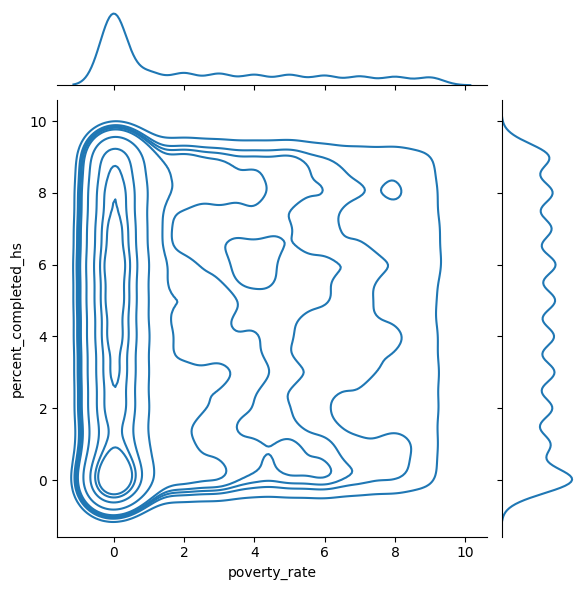

In [144]:

sns.jointplot(
    data=temp,
    x="poverty_rate", 
    y="percent_completed_hs", 
    # hue="state",
    kind="kde"
    )


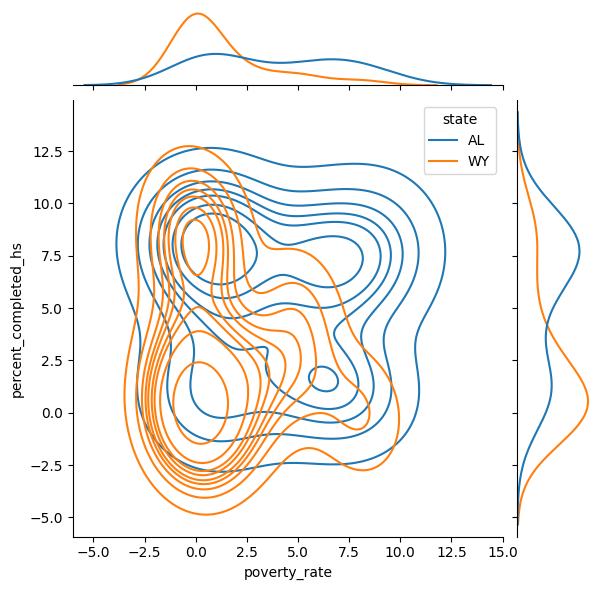

In [143]:
temp2 = pd.concat([temp.head(20) , temp.tail(20)])

# display(temp2)

sns.jointplot(
    data=temp2,
    x="poverty_rate", 
    y="percent_completed_hs", 
    hue="state",
    kind="kde"
    )


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

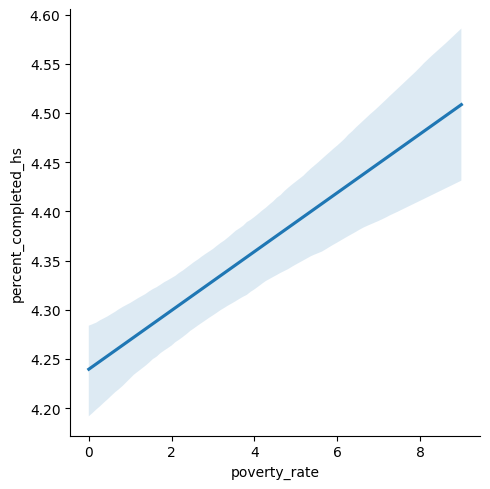

In [153]:
# print(temp.dtypes)


sns.lmplot(
    data=temp,     
    x="poverty_rate", 
    y="percent_completed_hs",
    legend= True,
    scatter=False,
    # hue="state"
    )

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [157]:
def try_to_float(x):
    try:
        return float(x)
    except:
        return 0
    
temp = dfs["df_share_race_city"].copy()
temp["state"] = temp["Geographic area"]
temp = temp.drop(columns=["Geographic area","City"])

for c in temp.columns:
    if c == "state":
        pass
    else:
        temp[c] = temp[c].apply(try_to_float)
        
temp = temp.groupby(by="state").mean()

temp.head()    


,share_white,share_black,share_native_american,share_asian,share_hispanic
state,,,,,
AK,45.26,0.56,45.48,1.38,2.13
AL,72.51,23.32,0.66,0.48,2.98
AR,78.45,16.30,0.76,0.48,4.27
AZ,59.93,0.95,28.59,0.73,20.14
CA,71.54,2.68,1.72,5.54,29.51


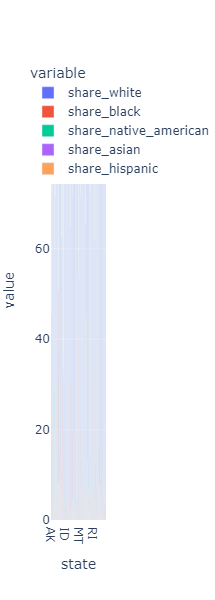

In [160]:
fig = px.bar(
    temp,
    height=600,
    barmode="group"
    )
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

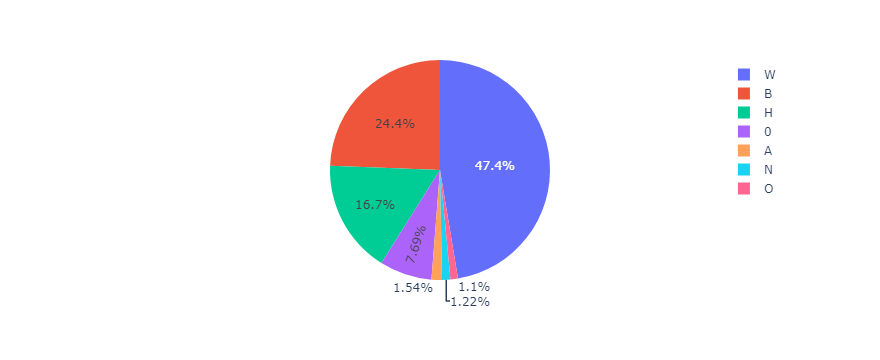

In [165]:
temp = dfs["df_fatalities"].copy()

temp["count"] = 1
temp = temp[["race","count"]].groupby("race").sum().reset_index()

temp.head()

fig = px.pie(
    temp, 
    values='count', 
    names='race',
    height=300,
    hole=True
    )
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

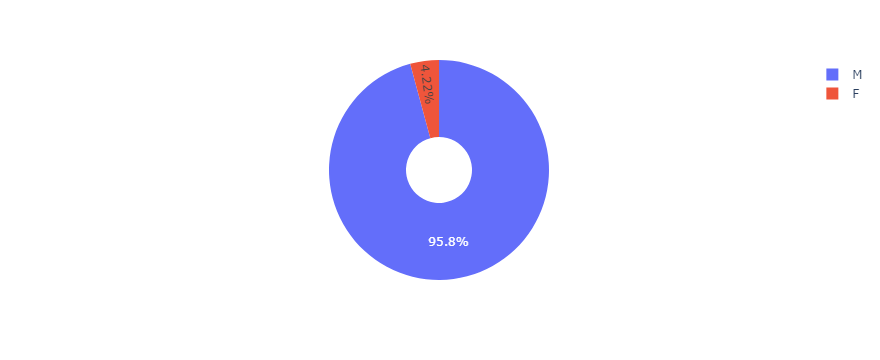

In [172]:
temp = dfs["df_fatalities"].copy()
# temp.head()

temp["count"] = 1
temp = temp[["gender","count"]].groupby("gender").sum().reset_index()

# temp.head()

fig = px.pie(
    temp, 
    values='count', 
    names='gender',
    height=300,
    hole=0.3
    )
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

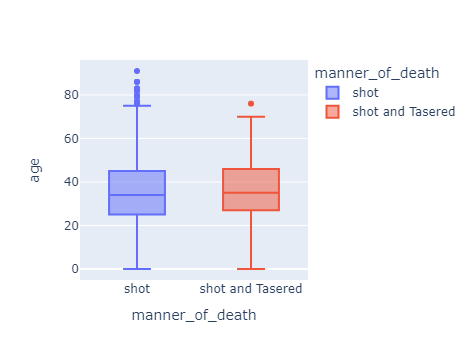

In [170]:
temp = dfs["df_fatalities"].copy()
temp.head()

temp["age"] = temp["age"].astype(float)

fig = px.box(
    temp, 
    y = "age",
    x =  "manner_of_death",
    color="manner_of_death"
    )

fig.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

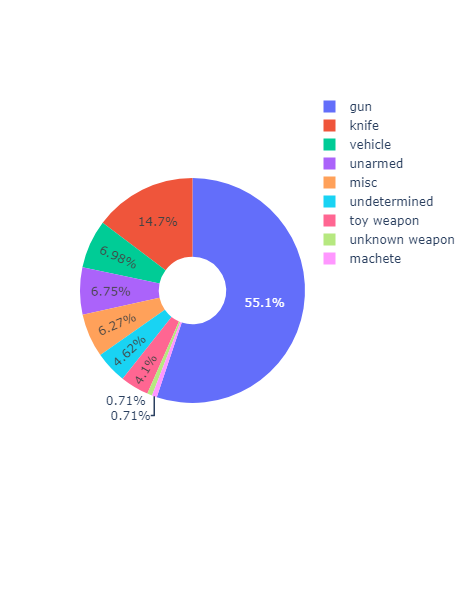

In [178]:
temp = dfs["df_fatalities"].copy()
temp.head()

temp["count"] = 1
temp = temp[["armed","count"]].groupby("armed").sum().reset_index()

temp = temp.sort_values(by="count",ascending=False)
temp.head(1000)

temp.loc[ temp['count'] < 15 , 'armed'] = 'misc'

fig = px.pie(
    temp, 
    values='count', 
    names='armed',
    height=600,
    hole=0.3
    )
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

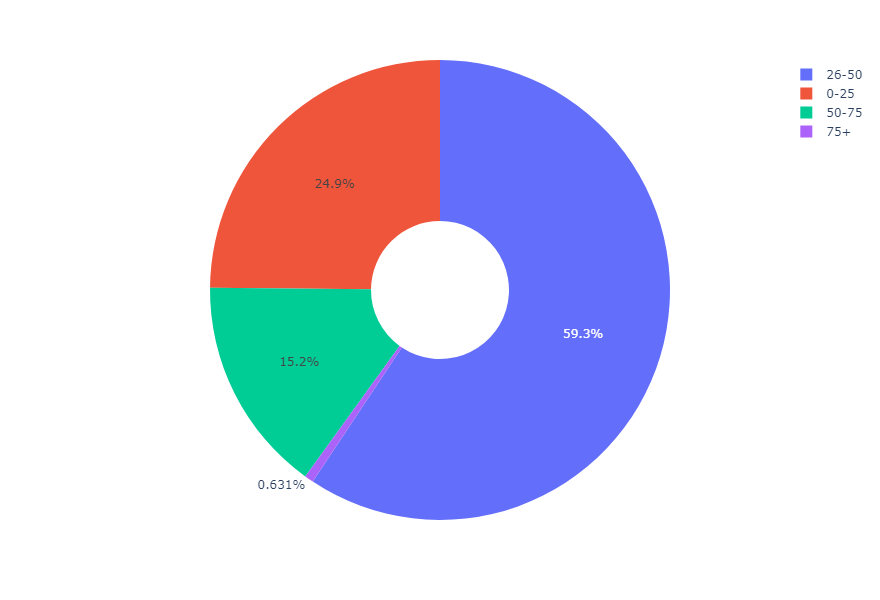

In [179]:
temp = dfs["df_fatalities"].copy()
temp.head()

temp["count"] = 1
temp["age_bracket"] = "75+"

temp.loc[ temp['age'] <= 75 , 'age_bracket'] = '50-75'
temp.loc[ temp['age'] <= 50 , 'age_bracket'] = '26-50'
temp.loc[ temp['age'] <= 25 , 'age_bracket'] = '0-25'


temp = temp[["age_bracket","count"]].groupby("age_bracket").sum().reset_index()


fig = px.pie(
    temp, 
    values='count', 
    names='age_bracket',
    height=600,
    hole=0.3
    )
fig.show()



Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

In [181]:
temp = dfs["df_fatalities"].copy()
# temp.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


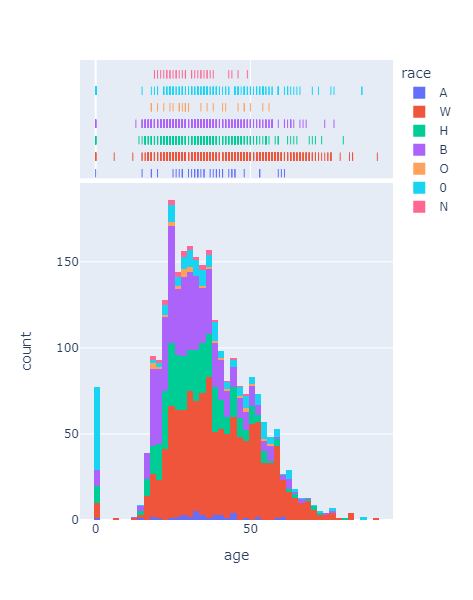

In [184]:
fig = px.histogram(
    temp, 
    x='age', 
    # y = "MissionStatus_int",
    color="race",
    marginal="rug",
    hover_data=temp.columns,
    height=600
    )
# fig.update_layout(barmode='overlay')
# fig.update_traces(opacity=0.80)
fig.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [189]:
temp = dfs["df_fatalities"].copy()
races = list(temp["race"].drop_duplicates())


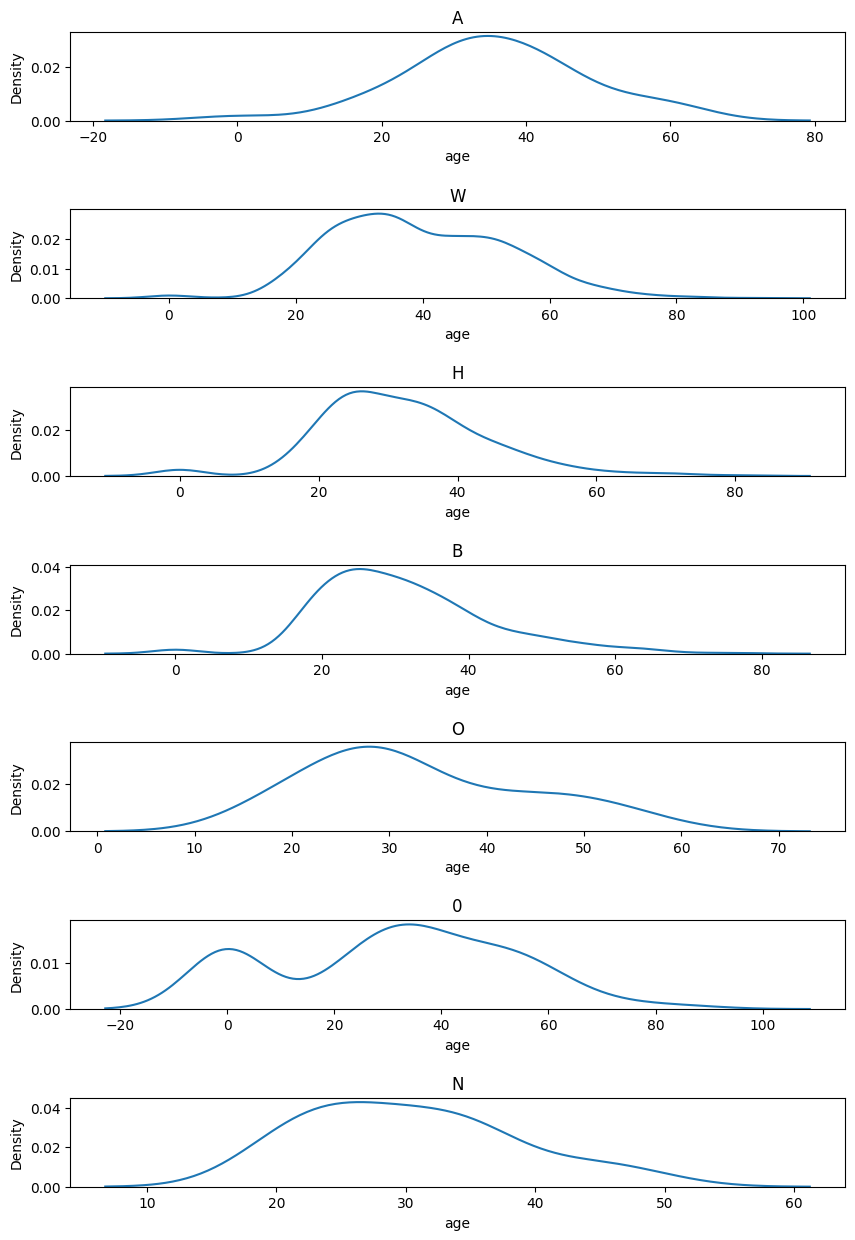

In [238]:
fig = plt.figure(figsize=(10, 15))
gs = fig.add_gridspec(len(races), 1, hspace=1, wspace=0)
axes = gs.subplots(sharex='row', sharey='row') #len(races),1) #figsize=(10, 10))


for index,r in enumerate(races):
    g = sns.kdeplot(data=temp[temp["race"] == r], x="age",ax= axes[index])
    # axes[index].xaxis.set_label_text( r)
    axes[index].set_title( r)


# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [240]:
temp = dfs["df_fatalities"].copy()
# temp.head()

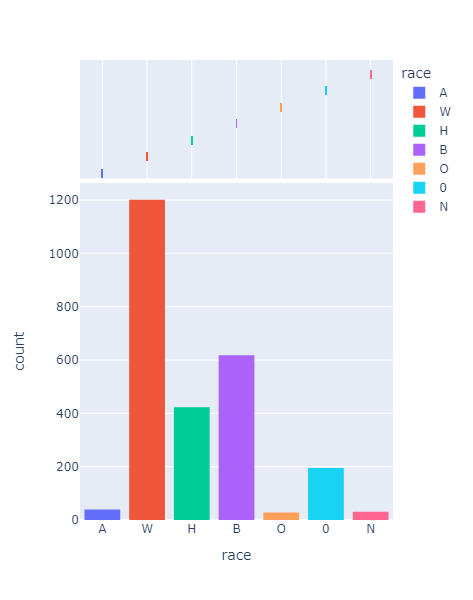

In [241]:
fig = px.histogram(
    temp, 
    x='race', 
    # y = "MissionStatus_int",
    color="race",
    marginal="rug",
    hover_data=temp.columns,
    height=600
    )
# fig.update_layout(barmode='overlay')
# fig.update_traces(opacity=0.80)
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

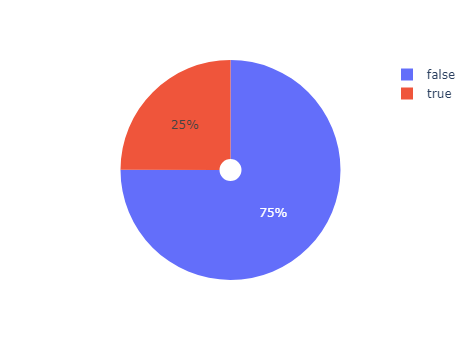

In [244]:
temp = dfs["df_fatalities"].copy()

# temp.head()

temp["count"] = 1
temp = temp[["signs_of_mental_illness","count"]].groupby("signs_of_mental_illness").sum().reset_index()

# temp.head()

fig = px.pie(
    temp, 
    values='count', 
    names='signs_of_mental_illness',
    height=300,
    hole=0.1
    )
fig.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

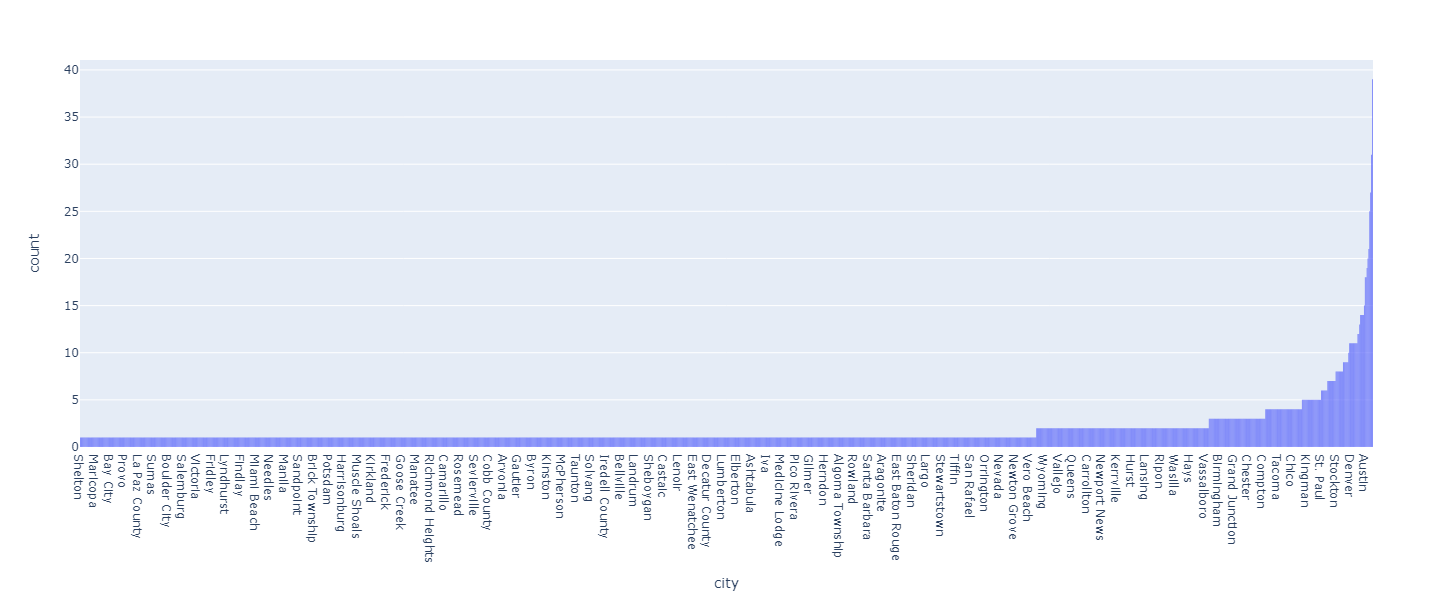

In [252]:
temp = dfs["df_fatalities"].copy()

fig = px.histogram(
    temp, 
    x='city', 
    # y = "MissionStatus_int",
    # color="race",
    # marginal="rug",
    # hover_data=temp.columns,
    height=600
    ).update_xaxes(categoryorder='total ascending')
# fig.update_layout(barmode='overlay')
# fig.update_traces(opacity=0.80)
fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

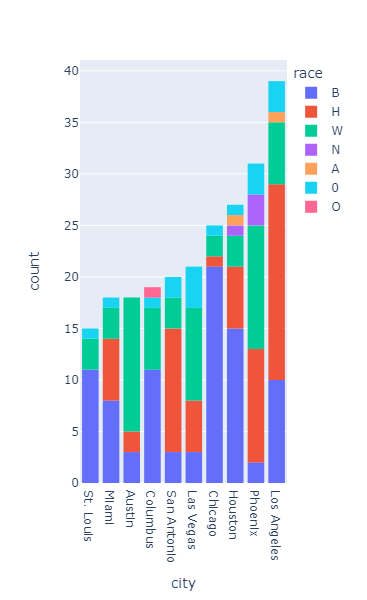

In [266]:
temp = dfs["df_fatalities"].copy()
temp.head()

top10city = dfs["df_fatalities"].copy()
top10city["count"] = 1
top10city = top10city[["city","count"]].groupby(["city"]).sum().reset_index()
top10city = top10city.sort_values(by="count",ascending=False).reset_index()
top10city  = top10city[:10]

# temp.head(1000)

temp = temp[temp["city"].isin(list(top10city["city"]))]

fig = px.histogram(
    temp, 
    x='city', 
    # y = "count",
    color="race",
    # marginal="rug",
    hover_data=temp.columns,
    height=600
    ).update_xaxes(categoryorder='total ascending')
# fig.update_layout(barmode='overlay')
# fig.update_traces(opacity=0.80)
fig.show()


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

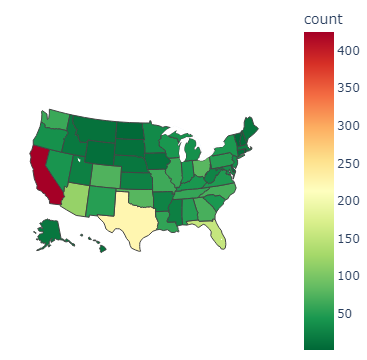

In [277]:
temp = dfs["df_fatalities"].copy()
temp.head()

temp["count"] = 1
temp = temp[["state","count"]].groupby(["state"]).sum().reset_index()
temp = temp.sort_values(by="count",ascending=False).reset_index()

temp.head()

fig = px.choropleth(
    temp, 
    locations='state', 
    locationmode="USA-states",
    color='count',
    color_continuous_scale="RdYlGn_r",
    scope="usa",
    labels={'count':'count'},
  )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

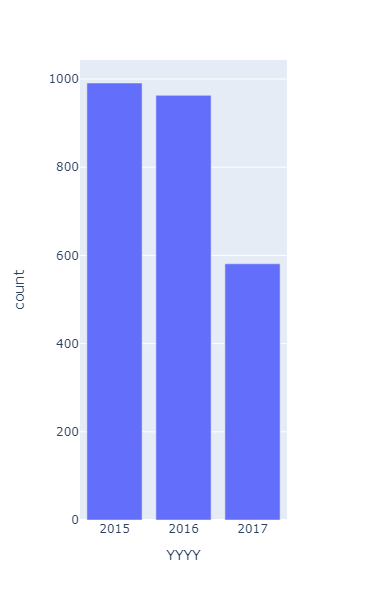

In [282]:
temp = dfs["df_fatalities"].copy()
temp.head()

temp['YYYY'] = pd.to_datetime(temp['date']).dt.strftime("%Y")

# print(temp['YYYY'].min())
# print(temp['YYYY'].max())

temp["count"] = 1
temp = temp[["YYYY","count"]].groupby(["YYYY"]).sum().reset_index()
temp = temp.sort_values(by="count",ascending=False).reset_index()

temp.head()

fig = px.bar(
    temp, 
    x='YYYY', 
    y = "count",
    height=600
    )
fig.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).